In [559]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [560]:
data=pd.read_csv("CarPrice_Assignment.csv")
data


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [561]:
'''data.fuelsystem.unique()
fuelsys=data.groupby('fuelsystem')
fuelsys.mean()/1000'''

"data.fuelsystem.unique()\nfuelsys=data.groupby('fuelsystem')\nfuelsys.mean()/1000"

In [562]:
'''data.enginetype.unique()
engtp=data.groupby('carbody')
engtp.mean()/1000'''

"data.enginetype.unique()\nengtp=data.groupby('carbody')\nengtp.mean()/1000"

In [563]:
data=data.drop(columns=['CarName','car_ID','symboling'])
#df = df.replace(['old value'], 'new value')
data=data.replace(['gas'],1)
data=data.replace(['diesel'],2)
data=data.replace(['std'],1)
data=data.replace(['turbo'],2)
data=data.replace(['two'],2)
data=data.replace(['four'],4)
data=data.replace(['six'],6)
data=data.replace(['eight'],8)
data=data.replace(['three'],3)
data=data.replace(['five'],5)
data=data.replace(['twelve'],12)
data=data.replace(['4wd'],11.1)
data=data.replace(['rwd'],19.9)
data=data.replace(['fwd'],9.2)
data=data.replace(['1bbl'],7.55)
data=data.replace(['2bbl'],7.47)
data=data.replace(['spfi'],11.04)
data=data.replace(['spdi'],10.99)
data=data.replace(['4bbl'],12.14)
data=data.replace(['mfi'],12.96)
data=data.replace(['idi'],15.83)
data=data.replace(['mpfi'],17.75)
data=data.replace(['dohc'],18.1)
data=data.replace(['dohcv'],31.4)
data=data.replace(['l'],14.62)
data=data.replace(['ohc'],11.57)
data=data.replace(['ohcf'],13.73)
data=data.replace(['ohcv'],25.1)
data=data.replace(['rotor'],13)
data=data.replace(['convertible'],21.89)
data=data.replace(['hardtop'],22.2)
data=data.replace(['hatchback'],10.37)
data=data.replace(['sedan'],14.34)
data=data.replace(['wagon'],12.37)
data=data.replace(['front','rear'],[1,2])
data.dtypes

fueltype              int64
aspiration            int64
doornumber            int64
carbody             float64
drivewheel          float64
enginelocation        int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype          float64
cylindernumber        int64
enginesize            int64
fuelsystem          float64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [564]:
X = data.drop(columns=['price'])
Y = data['price']

X = X.values
Y = Y.values
Y = Y.reshape(len(Y),1)

In [565]:
x0, x1, y0, y1 = train_test_split(X,Y,test_size = 0.3,random_state=23)


In [566]:
lr=0.06
cv=0.00000001
b=0
prev_cost=0
w=np.zeros(x0.shape[1])

w=w.reshape(-1,1)
n=len(y0)
cost_history=[]


In [567]:
x0=(x0-x0.mean())/(x0.std())
y0=(y0-y0.mean())/(y0.std())


In [568]:

def CostFunction(y0,y,n):
    cost = np.sum(((y0-y)**2))/(2*n)
    
    return cost

def CostFunctionReg(y0, y, n, w, rl):
    error=y0-y
    squared_error=error**2
    rg=(rl/(2*n))*np.sum(w**2)
    cost=(np.sum(squared_error)+rg)/(2*n)
    
    return cost

In [569]:
while True:
        y=x0.dot(w)+b
        #print(f"y: {y[0]}")
        loss = (y-y0)
        #print(f"Loss: {loss[0]}")
        weight_gradient=np.dot(x0.T,loss)/len(y0)
        w = w-(lr*weight_gradient)
        #print(f"Weight1:{w[0]}")
        
        bias_gradient = np.sum(loss)/len(y0)
        b = b-(lr*bias_gradient)
        
        cost = CostFunctionReg(y0,y,n,w,0.1)
        #cost = CostFunction(y0,y,n)
        #print(f"Cost: {cost}")
        diff=abs(cost-prev_cost)
        cost_history.append(cost)
        if diff<cv:
            break
        prev_cost=cost
print(f"Final weights:{w}")
print(f"Final b:{b}")
        
    

Final weights:[[ -0.65234157]
 [ -1.47741396]
 [ -2.15887472]
 [  6.58356731]
 [  9.13195369]
 [ -1.16225291]
 [  4.46136111]
 [  0.3294081 ]
 [  1.60364766]
 [ -0.52265666]
 [  0.95046668]
 [-15.37457331]
 [ -1.1504436 ]
 [ 11.6618317 ]
 [  0.96874625]
 [ -1.55345469]
 [ -2.1817532 ]
 [ 11.1811697 ]
 [  5.88486816]
 [  0.28059493]
 [  1.53083954]
 [  4.03332312]]
Final b:4.824428914762559


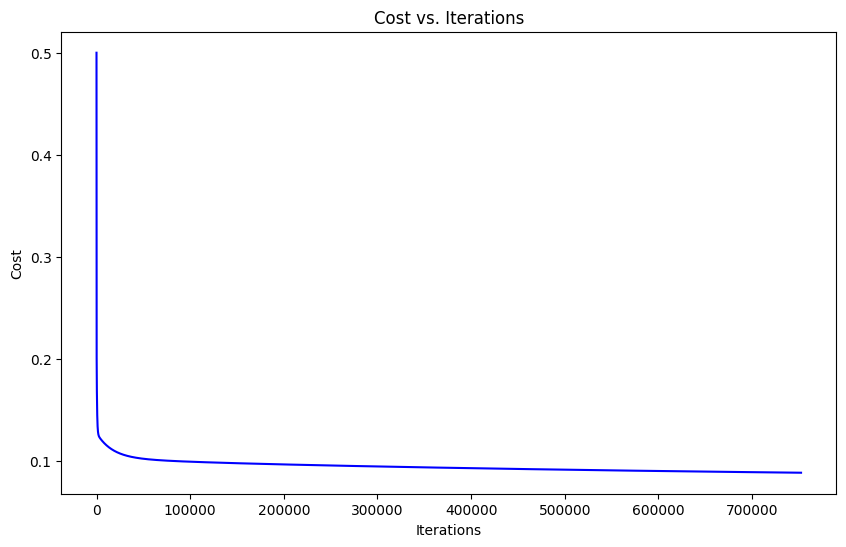

In [570]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(cost_history)), cost_history, 'b-')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()

In [571]:
from sklearn.metrics import r2_score
r2=r2_score(y0,y)
r2

0.8252401517547363

In [572]:
x1=(x1-x1.mean())/(x1.std())
y1=(y1-y1.mean())/(y1.std())
y1pred=x1.dot(w)+b

In [573]:
r2_test=r2_score(y1,y1pred)
r2_test

0.8362730323177805

In [574]:
'''plt.scatter(x0.T[1],y0) 
plt.xlabel('X')
plt.ylabel('Y') 
plt.title('X v/s Y') 
  
X = x0.T[1]
plt.plot(X,y) 
plt.show()'''


"plt.scatter(x0.T[1],y0) \nplt.xlabel('X')\nplt.ylabel('Y') \nplt.title('X v/s Y') \n  \nX = x0.T[1]\nplt.plot(X,y) \nplt.show()"